# Hamlet quote distributions

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from quotes.models import Match

In [3]:
quoted = []

for m in Match.query.filter(Match.size >= 5):
    quoted += range(m.a_start, m.a_start + m.size)

In [42]:
from quotes.text import RawText

hamlet = RawText.from_file('../data/hamlet.txt')

# 100 bins

First, with a fairly large bin size:

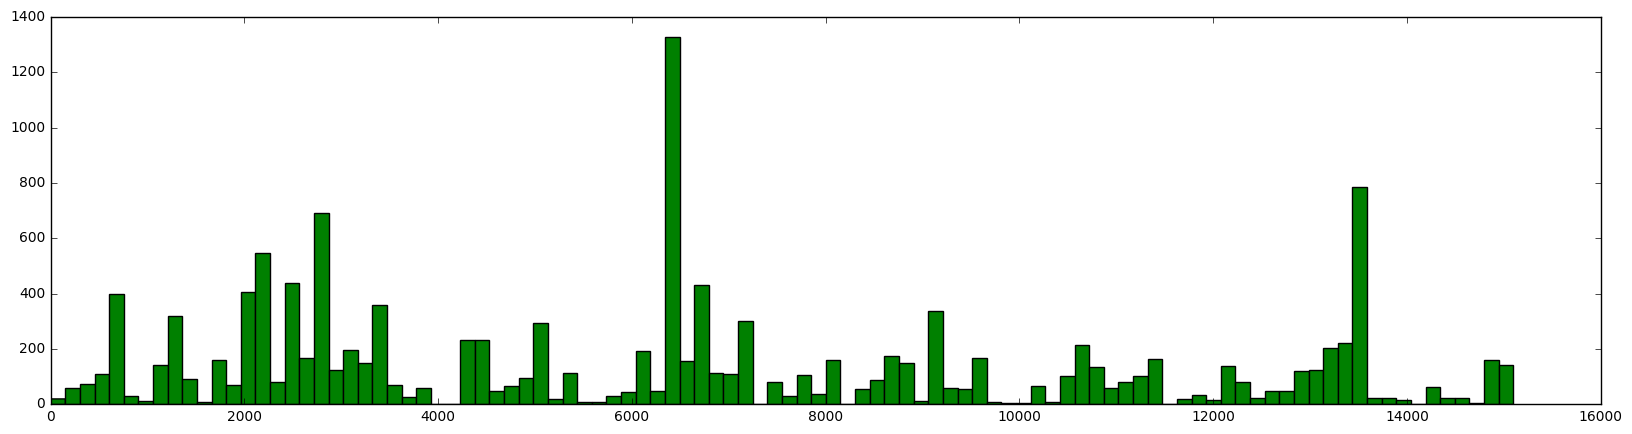

In [43]:
plt.figure(figsize=(20, 5))

n, bins, patches = plt.hist(
    quoted,
    range=(0, len(hamlet.tokens)),
    bins=100,
    color='green',
)

plt.show()

In [44]:
import numpy as np

bin_idxs = np.argsort(n)[::-1]
print(bin_idxs[:5])

[42 89 18 14 16]


In [45]:
def print_bin(idx):
    
    token1 = int(bins[idx])
    token2 = int(bins[idx+1]-1)
    
    char1 = hamlet.tokens[token1].char1
    char2 = hamlet.tokens[token2].char2

    print(hamlet.text[char1:char2])

## #1

No surprise, the top hit is to-be-or-not-to-be:

In [46]:
print_bin(42)

sugar o'er
The Devil himself.

King.
[Aside.] O, 'tis too true!
How smart a lash that speech doth give my conscience!
The harlot's cheek, beautied with plastering art,
Is not more ugly to the thing that helps it
Than is my deed to my most painted word:
O heavy burden!

Pol.
I hear him coming: let's withdraw, my lord.

[Exeunt King and Polonius.]

[Enter Hamlet.]

Ham.
To be, or not to be,--that is the question:--
Whether 'tis nobler in the mind to suffer
The slings and arrows of outrageous fortune
Or to take arms against a sea of troubles,
And by opposing end them?--To die,--to sleep,--
No more; and by a sleep to say we end
The heartache, and the thousand natural shocks
That flesh is heir to,--'tis a consummation
Devoutly to be wish'd. To die,--to sleep;--
To sleep! perchance to dream:--ay, there's the rub;
For in that sleep of death what dreams may come,
When we have shuffled off this mortal coil,
Must give us pause: there's the respect
That makes calamity of so long life;
For who wou

## #2

A bit surprising, I assume anchored by "When our deep plots do fail; and that should teach us / There's a divinity that shapes our ends"?

In [47]:
print_bin(89)

patient as the female dove,
When that her golden couplets are disclos'd,
His silence will sit drooping.

Ham.
Hear you, sir;
What is the reason that you use me thus?
I lov'd you ever: but it is no matter;
Let Hercules himself do what he may,
The cat will mew, and dog will have his day.

[Exit.]

King.
I pray thee, good Horatio, wait upon him.--

[Exit Horatio.]
[To Laertes]
Strengthen your patience in our last night's speech;
We'll put the matter to the present push.--
Good Gertrude, set some watch over your son.--
This grave shall have a living monument:
An hour of quiet shortly shall we see;
Till then in patience our proceeding be.

[Exeunt.]



Scene II. A hall in the Castle.

[Enter Hamlet and Horatio.]

Ham.
So much for this, sir: now let me see the other;
You do remember all the circumstance?

Hor.
Remember it, my lord!

Ham.
Sir, in my heart there was a kind of fighting
That would not let me sleep: methought I lay
Worse than the mutinies in the bilboes. Rashly,
And prais'd be ra

## #3

"Something is rotten in the state of Denmark."

In [48]:
print_bin(18)

Hor.
He waxes desperate with imagination.

Mar.
Let's follow; 'tis not fit thus to obey him.

Hor.
Have after.--To what issue will this come?

Mar.
Something is rotten in the state of Denmark.

Hor.
Heaven will direct it.

Mar.
Nay, let's follow him.

[Exeunt.]



Scene V. A more remote part of the Castle.

[Enter Ghost and Hamlet.]

Ham.
Whither wilt thou lead me? speak! I'll go no further.

Ghost.
Mark me.

Ham.
I will.

Ghost.
My hour is almost come,
When I to sulph'uous and tormenting flames
Must render up myself.

Ham.
Alas, poor ghost!

Ghost.
Pity me not, but lend thy serious hearing
To what I shall unfold.

Ham.
Speak; I am bound to hear.

Ghost.
So art thou to revenge, when thou shalt hear.

Ham.
What?

Ghost.
I am thy father's spirit;
Doom'd for a certain term to walk the night,
And for the day confin'd to wastein fires,
Till the foul crimes done in my days of nature
Are burnt and purg'd away. But that I am forbid
To tell the secrets of my prison-house,
I could a tale unfold 

# 500 bins

What if we use a much smaller bin size, to narrow down on more specific passages?

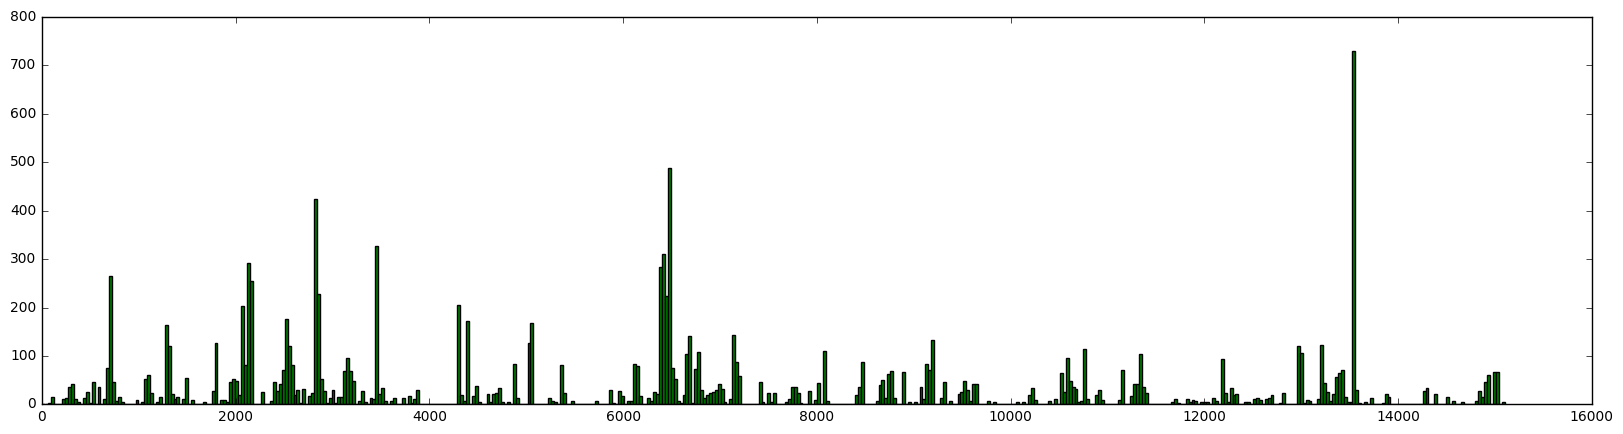

In [59]:
plt.figure(figsize=(20, 5))

n, bins, patches = plt.hist(
    quoted,
    range=(0, len(hamlet.tokens)),
    bins=500,
    color='green',
)

plt.show()

And then print out the top 20 passages (separated by the lines). Quick thoughts:

- So, by a fairly large magin, the most-cited passage in the novels is "when our deep plots do fail."
- Interesting that "to be" is fairly far down, #7.
- #3, bin 93, Hamlet talking to the ghost at the end of the first act - is surprising to me?

In [60]:
bin_idxs = np.argsort(n)[::-1]

for idx in bin_idxs[:20]:
    print('-'*100)
    print(idx)
    print_bin(idx)

----------------------------------------------------------------------------------------------------
448
serves us well,
When our deep plots do fail; and that should teach us
There's a divinity that shapes our ends,
Rough-hew them how we will.

Hor.
That is most certain.

Ham.
Up from my cabin,
My sea-gown scarf'd about me, in the dark
Grop'd I to find out them: had my desire;
Finger'd their packet; and, in fine, withdrew
To mine own room again: making
----------------------------------------------------------------------------------------------------
214
under a weary life,
But that the dread of something after death,--
The undiscover'd country, from whose bourn
No traveller returns,--puzzles the will,
And makes us rather bear those ills we have
Than fly to others that we know not of?
Thus conscience does make cowards of us all;
And thus the native hue of resolution
Is sicklied o'er with the pale cast of thought;
And enterprises
--------------------------------------------------------